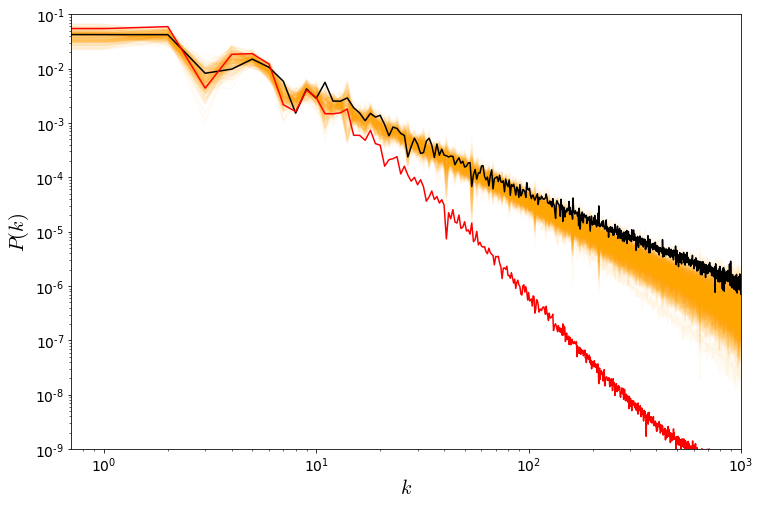

In [3]:
import sys
import numpy as np
import nifty7 as ift
import random as rn
import itertools
import matplotlib.pyplot as plt
from math import pi
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import os
import imageio
from scipy import fft, fftpack
import matplotlib as mpl


mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.size'] = 14

def norm(arr):
    normArr = np.sqrt(np.multiply(arr[0],arr[0]) + np.multiply(arr[1],arr[1]) + np.multiply(arr[2],arr[2]))
    return normArr

N_pixels = 50

position_space = ift.RGSpace([N_pixels, N_pixels, N_pixels])

# Specify harmonic space corresponding to signal space
harmonic_space = position_space.get_default_codomain()

N_data_points = 1000
lam = 0.2
anisotropy = False

from mpl_toolkits import mplot3d

if anisotropy == True:
    posteriorSamplesList = np.load("posterior_samples/Post_Samples_(N=%d_lambda=%.1f).npy"%(N_data_points, lam))
    groundTruth = np.load("posterior_samples/Ground_truth_(N=%d_lambda=%.1f).npy"%(N_data_points, lam))
    posteriorMean = np.load("posterior_samples/Posterior_mean_(N=%d_lambda=%.1f).npy"%(N_data_points, lam))
else:
    posteriorSamplesList = np.load("posterior_samples/Post_Samples_(N=%d_lambda=INF).npy"%N_data_points)
    groundTruth = np.load("posterior_samples/Ground_truth_(N=%d_lambda=INF).npy"%N_data_points)
    posteriorMean = np.load("posterior_samples/Posterior_mean_(N=%d_lambda=INF).npy"%N_data_points)


harmonic_space = position_space.get_default_codomain()
HT = ift.HartleyOperator(harmonic_space)

groundTruth = ift.Field.from_raw(ift.DomainTuple.make(position_space), norm(groundTruth))
groundTruthHarmonic = HT.inverse(groundTruth)

constantField = ift.Field.from_raw(ift.DomainTuple.make(position_space), np.ones((50,50,50)))
constantFieldHarmonic = HT.inverse(constantField)

posteriorMean = ift.Field.from_raw(ift.DomainTuple.make(position_space), norm(posteriorMean))
posteriorMeanHarmonic = HT.inverse(posteriorMean)

line1, line2, line3, line4  = ift.power_analyze(groundTruthHarmonic), ift.power_analyze(groundTruthHarmonic), ift.power_analyze(posteriorMeanHarmonic), ift.power_analyze(constantFieldHarmonic)

fig = plt.figure(figsize=(12,8))


for field in posteriorSamplesList:
    posteriorSample = ift.Field.from_raw(ift.DomainTuple.make(position_space), norm(field))
    posteriorSampleHarmonic = HT.inverse(posteriorSample)
    line = ift.power_analyze(posteriorSampleHarmonic)
    plt.loglog(line.val, alpha = 0.05, color = 'orange')
plt.loglog(line2.val, color = 'black')
plt.loglog(line3.val, color = 'red')
plt.ylim(ymax = 1e-1, ymin = 1e-9)
plt.xlim(xmax = 1e3)
plt.xlabel(r'$k$', fontsize = 20)
plt.ylabel(r'$P(k)$', fontsize = 20)


   
plt.show()

